# Lab 2 - Model Agnostic Methods

#### Topics:
- Permutation Importance
- KernelSHAP
- Dependence Plot
- Model Agnostic Methods Experiment

In [1]:
import os  # python default library to implement os tasks, such as reading and creating file paths from the disk.
import sklearn  # library with multiple machine learning models implemented already to be used for ease

import numpy as np  # A staple in python math functions
import pandas as pd  # A staple in python data processing and data science
import seaborn as sns  # A library with many pre-configured plots to reduce time to plot data

import matplotlib.pyplot as plt  # The library which has implemented most of the plots

from sklearn.model_selection import train_test_split  # A utility method made for splitting training and testing data

from sklearn.linear_model import LogisticRegression  # the models implemented by sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score  # accuracy metrics

import shap  # The library with the methods for SHAP implemented

from sklearn.inspection import permutation_importance  # the method which has implemented the permutation importance
from sklearn.inspection import PartialDependenceDisplay  # the method that can be used for two variables PDP

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 1) Permutation Importance

[Reference to scikit.inspection submodule](https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence-plots)

### a) Perform Permutation Importance for logistic model for all the attributes and plot the results. Give a brief interpretation of your results.

In [4]:
FMT = 'csv'
FILE_NAME = 'heart'

PATH_TO_DIR = os.getcwd()
PATH_TO_FILE = os.path.join(PATH_TO_DIR, f'{FILE_NAME}.{FMT}')

read_method = pd.read_csv
heart_data = read_method(PATH_TO_FILE, sep=',', header=0, decimal='.', engine='python')
print(heart_data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [5]:
labels = heart_data['target']
heart_data = heart_data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(heart_data, labels, test_size=0.2, random_state=0)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

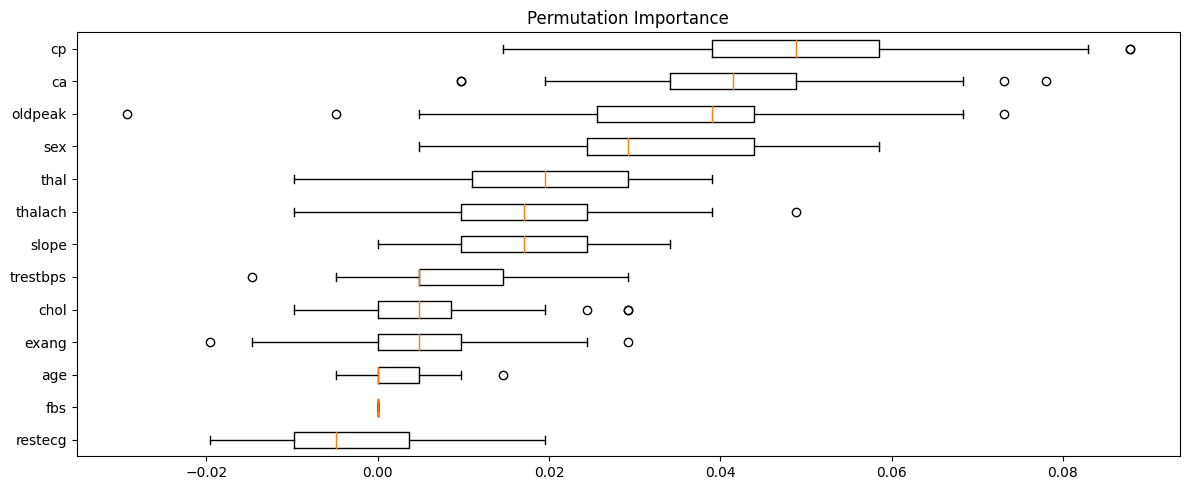

In [6]:
log_model_permutation_importance = permutation_importance(log_model, X_test, y_test, n_repeats=50, random_state=0)

result = log_model_permutation_importance

perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

ax1.title.set_text('Permutation Importance')
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

##### Answer:
'cp' feature is the one that is most likely to show a bigger difference in prediction when using permutation importance. This is because the model's predictions are most affected by the permutation of the feature.

### b) Explain which model is most likely to be show a bigger difference in prediction when using permutation importance.

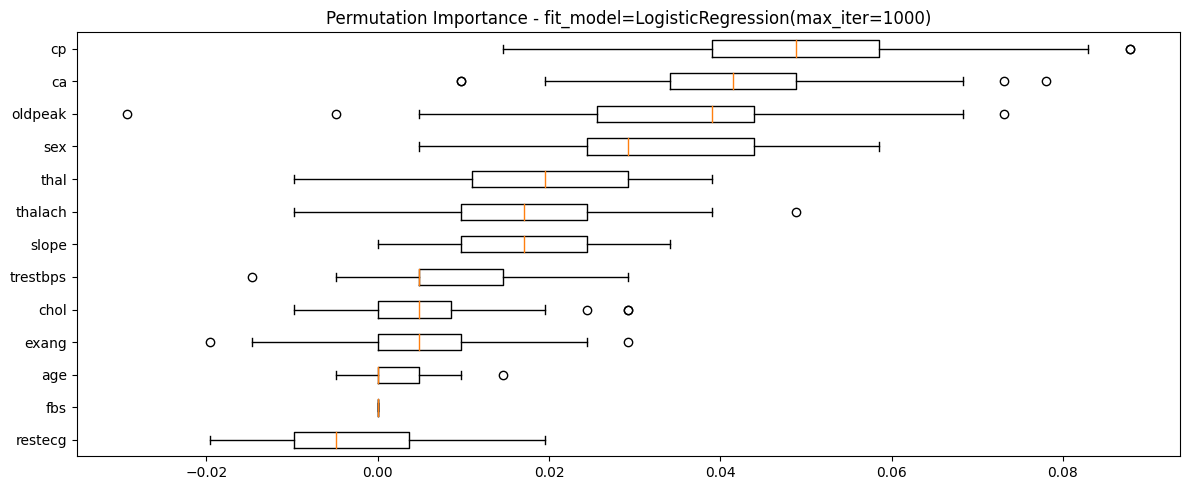

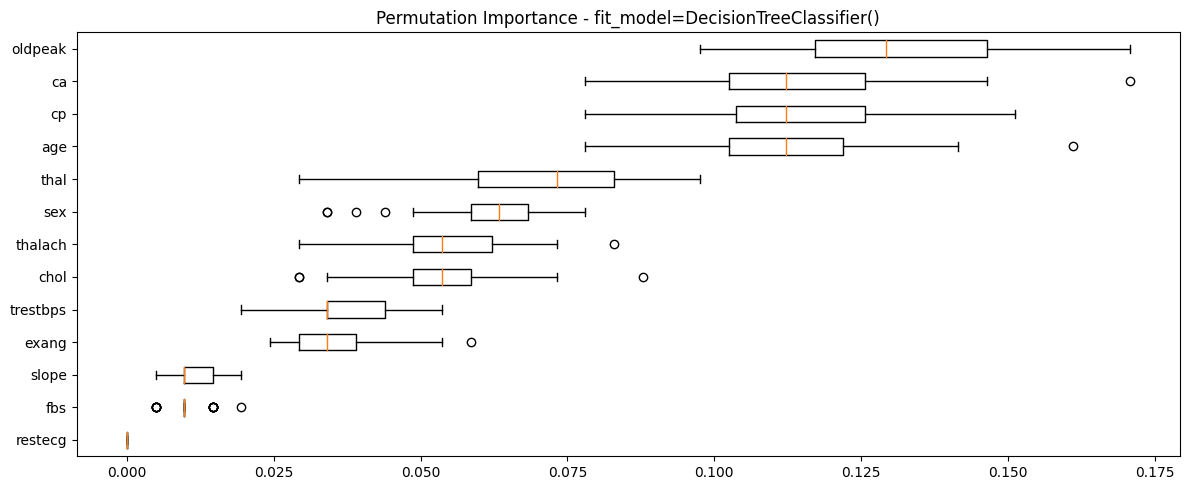

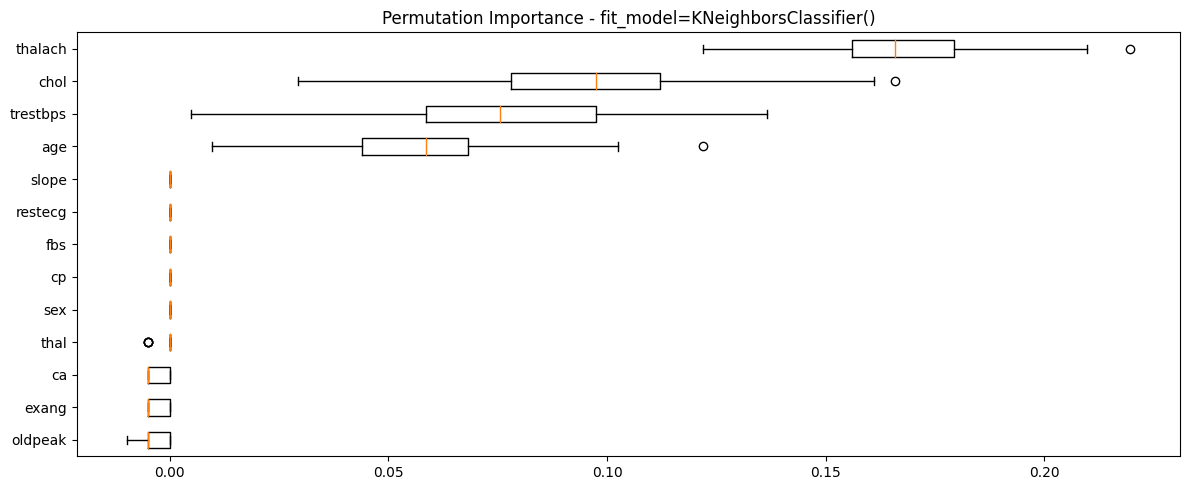

In [7]:
for fit_model in [log_model, tree_model, knn_model]:
    result = permutation_importance(fit_model, X_test, y_test, n_repeats=50, random_state=0)

    perm_sorted_idx = result.importances_mean.argsort()

    fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

    ax1.title.set_text(f'Permutation Importance - {fit_model=}')
    ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
    fig.tight_layout()
    plt.show()

##### Answer:
The model that is most likely to show a bigger difference in prediction when using permutation importance is the tree model. This is because the model's predictions are most affected by the permutation of the feature. The 3 graphs above show that the permutation importance of the tree model is higher than the other 2 models. This is because it is more sensitive to feature permutations.

### c) Perform Permutation Importance for two features.
i. Choose the most explainable features and motivate why you have chosen these two features.
ii. Run the permutation importance for each model. Comment on the differences.

[Reference to Sub Module](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html)

Computing partial dependence plots...


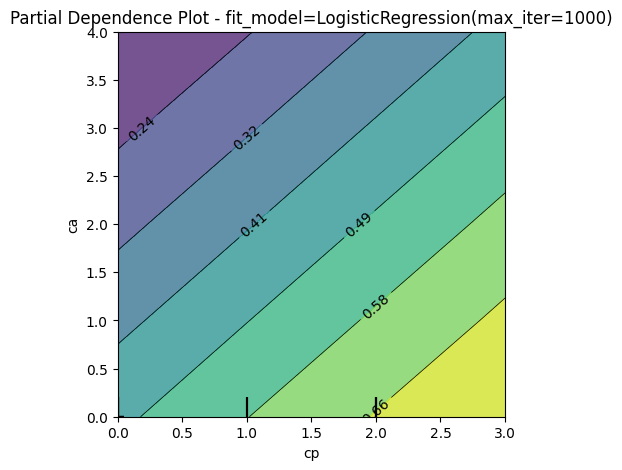

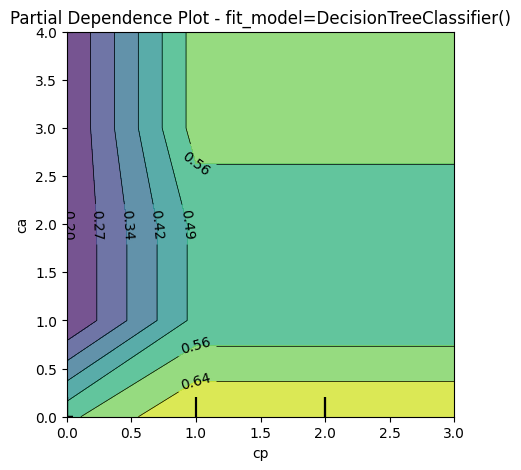

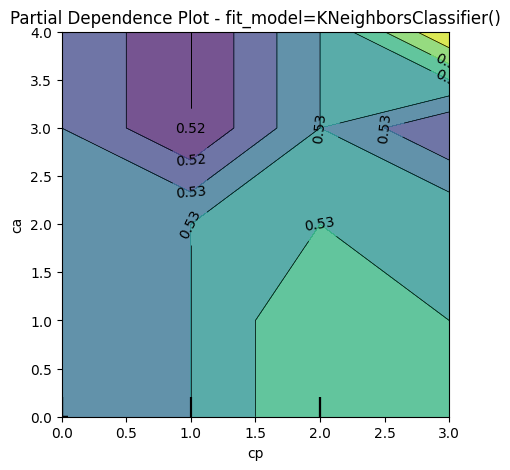

In [8]:
print('Computing partial dependence plots...')

for fit_model in [log_model, tree_model, knn_model]:
    fig, ax = plt.subplots(figsize=(5, 5))

    column_one = X_test.columns.get_loc('cp')
    column_two = X_test.columns.get_loc('ca')

    PartialDependenceDisplay.from_estimator(fit_model, X_test, [(column_one, column_two)], n_jobs=3, grid_resolution=20, ax=ax)
    ax.set_title(f'Partial Dependence Plot - {fit_model=}')
    plt.show()

##### Answer:
i.

The most explainable features are 'cp' and 'ca'. This is because the permutation importance of these features is also the highest, as shown in part 1a.

ii.

- log_model:
As 'cp' increases, the probability of belonging to the positive class increases. As 'ca' increases linearly, the probability of belonging to the positive class decreases linearly. This means that 'cp' and 'ca' are positively and negatively correlated with the target variable, respectively.

- tree_model:
When the value of 'cp' increases from 0 to 1, the probability of belonging to the positive class increases. When 'ca' has a value between 0 and 0.25, the probability of belonging to the positive class is the highest.This suggests that 'cp' and 'ca' are positively and negatively correlated with the target variable, respectively.

- knn_model:
The probability of belonging to the positive class is stable. This suggests that 'cp' and 'ca' are not correlated with the target variable.

## 2) KernelSHAP

##### Note: You will need to have the jupyter notebook to be trusted to use the javascript methods.

[Reference to shap Library](https://shap.readthedocs.io/en/latest/index.html)

### a) Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

[Reference to KernelSHAP](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html)

In [9]:
# !pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [10]:
background = X_train.sample(n=82)
explainer = shap.KernelExplainer(log_model.predict, background)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/205 [00:00<?, ?it/s]

### b) Plot a SHAP summary plot using the bar chart using all the features in the data and explain the results of the plots.

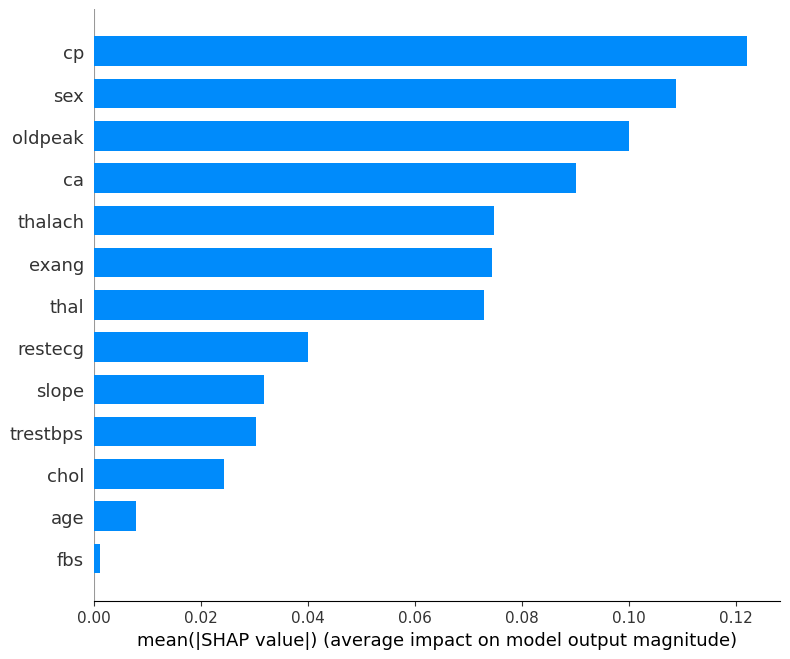

In [12]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")
plt.show()

### Answer:
The features are ordered from the highest to the lowest effect on the prediction. The most influential feature is "cp", which lie on the top and the least influential feature is "fbs", which lie on the bottom. Features close to the bottom have little impact on the prediction. "cp", "ca", "oldpeak", "sex" are top 4 features that are positively associated with higher model predictions. This means that higher values of these features tend to increase the likelihood of the target event. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

### c) Plot the partial dependence plot using the SHAP values for the attribute 'exang' and explain how to interpret the plot.

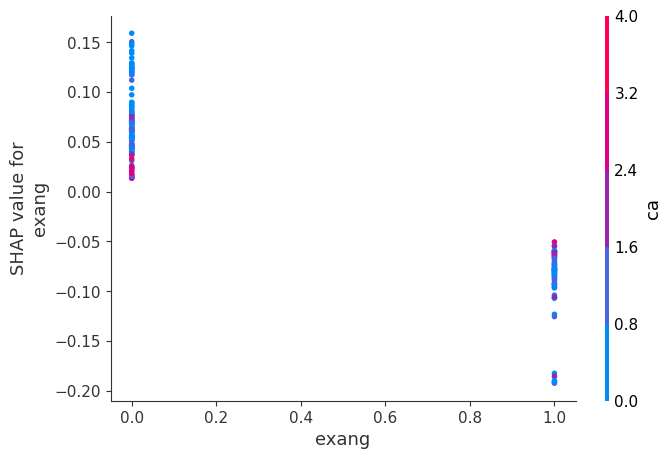

In [13]:
shap.dependence_plot('exang', shap_values, X_test, feature_names=X_test.columns)
plt.show()

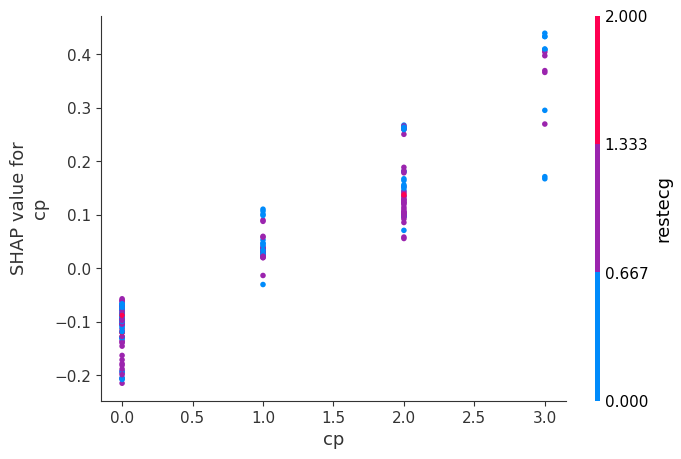

In [14]:
shap.dependence_plot('cp', shap_values, X_test)

##### Explanation:
'exang' feature holds a binary value. The plot shows that when 'exang' is 0, the SHAP value for 'exang' is a positive value between 0 and 0.20. When 'exang' is 1, the SHAP value for 'exang' is a negative value between -0.05 and -0.25. This means that when the shape value 'exang' is negative, the probability of belonging to the positive class increases. When the shape value 'exang' positive, the probability of belonging to the positive class decreases. The plot shows how changes in the 'exang' feature influence the model's prediction. The y-axis of the plot represents the impact of 'exang' on the model's prediction. Moreover, the variations/uncertainty in the SHAP values is wider when 'exang' becomes more prevalent
 

### d) Plot a 'force plot' (part of shap library) for a random X_test data point, and explain the figure.

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

### Answer:
The figure suggests all features besides 'exang' and 'sex' increases the chance of hearth disease. 'cp' feature with a value of 2 has the highest impact on the positive diagnosis of heart disease with approximately 0.2 increase from the base value, followed by 'thalach' feature having approximately 0.15 increase from the base value. 'exang' feature having a positive value decreases the probability by approximately 0.09.

In [16]:
explanation_contribution = pd.DataFrame(shap_values, columns=X_test.columns)
explanation_contribution.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,-0.001564,0.019497,0.017834,-0.006784,0.001555,0.000006,0.004748,0.007705,0.018094,0.003579,-0.002115,0.019866,0.007823
std,0.010906,0.135240,0.149284,0.041525,0.032944,0.001677,0.045956,0.089972,0.080801,0.117281,0.038486,0.107793,0.089668
min,-0.072192,-0.145030,-0.214465,-0.130699,-0.133211,-0.009411,-0.126812,-0.380035,-0.192329,-0.354678,-0.109187,-0.403182,-0.198788
25%,-0.007504,-0.067384,-0.092922,-0.024439,-0.015805,-0.000934,-0.035605,-0.062749,-0.064419,-0.091847,-0.023606,-0.033495,-0.059465
50%,-0.000751,-0.047198,0.020058,-0.001218,0.006820,0.000122,0.019417,0.014167,0.045808,0.024833,-0.014416,0.052869,0.031538
75%,0.005189,0.113765,0.107203,0.014468,0.022445,0.001038,0.034545,0.073759,0.071191,0.093795,0.030207,0.097867,0.054765
max,0.022447,0.347151,0.439572,0.103282,0.178683,0.006334,0.115115,0.208823,0.159124,0.189389,0.122817,0.161375,0.472274


This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).

### e) Plot the summary plot for each of the attributes and give an interpretation of the plot.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


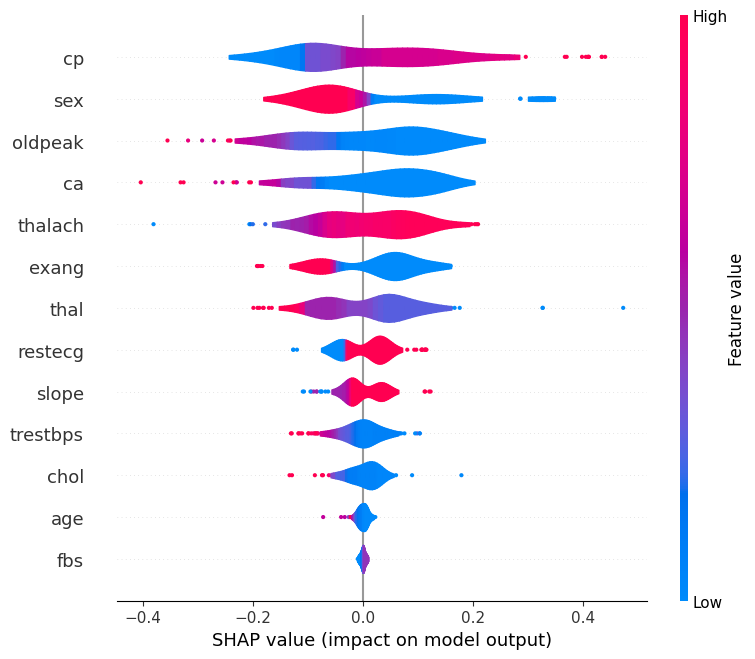

In [18]:
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="violin")

##### Explanation:
The horizontal axis represents the SHAP value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations. 
We can also see how higher and lower values of the feature will affect the result.
In this example, higher oldpeak and ca have a negative impact on the prediction, while lower values of 'oldpeak' have a positive impact. On the contrary, high values of 'cp' and 'thalach' have the postive effect on the prediction. 'fbs'has almost no contribution to the prediction, whether its values are high or low.

## 3) Dependence Plot

### a) Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

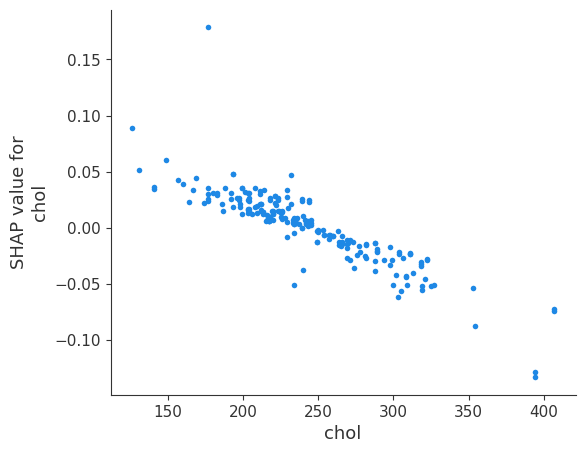

In [23]:
shap.initjs()  # initialise the js for the dependence_plot method
# Plot the dependence plot for 'chol' across the whole dataset
shap.dependence_plot('chol', shap_values, X_test, interaction_index=None, feature_names=X_test.columns)

##### Explanation:
The dependence plot shows the impact of a single feature across the whole dataset. The plot shows that when 'chol' is between 150 and 250, the SHAP value for 'chol' is a positive value. When 'chol' is between 250 and 400, the SHAP value for 'chol' is a negative value. The plot assumes a simple linear relationship between 'chol' or cholesterol level with the target variable. Positive SHAP values indicate that higher 'chol' values contribute to higher model predictions, while negative values indicate the opposite. So when 'chol' value increase, it contributes less to model predictions.



### b) Plot the two-way PDP showing interactions between features ‘Resting blood pressure’ and ‘Chest pain type’ and explain their effect.

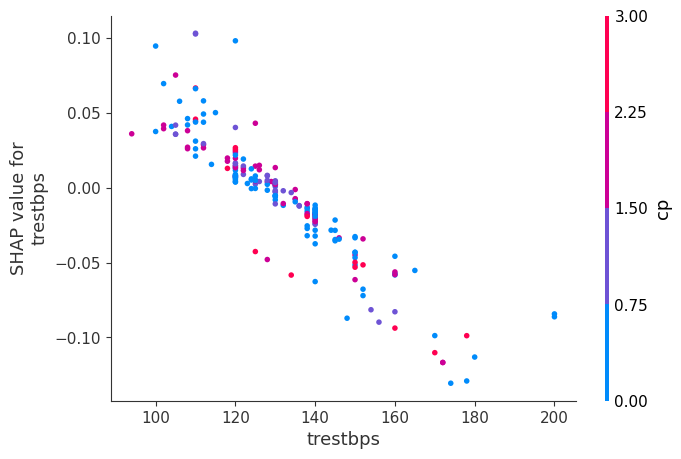

In [21]:
feature1 = 'trestbps'
feature2 = 'cp'

shap.dependence_plot(
    ind=feature1,
    shap_values=shap_values,
    interaction_index=feature2,
    features=X_test # data
)

##### Explanation:
When trestbps has a value between 80 and 140 shap value is a positive value between 0 and 0.18. When trestbps has a value between 140 and 200 shap value is a negative value between 0 and 0.18. This means that when trestbps is between 80 and 140, the probability of belonging to the positive class increases. When trestbps is between 140 and 200, the probability of belonging to the positive class decreases.
The cp value tend to decrease in shap value when trestbps increases. The higher the cp value is the higher the shap value is. This means that cp is positively correlated with the target variable, however, we can examine that as trestbps increases the shap value decreases indicating that trestbps is negatively correlated with the target variable.


## 4) Perform the same analysis as above for a model of your choice (other than the Logistic Model) and comment on the sensitivity of the two models by comparing and contrasting the results.

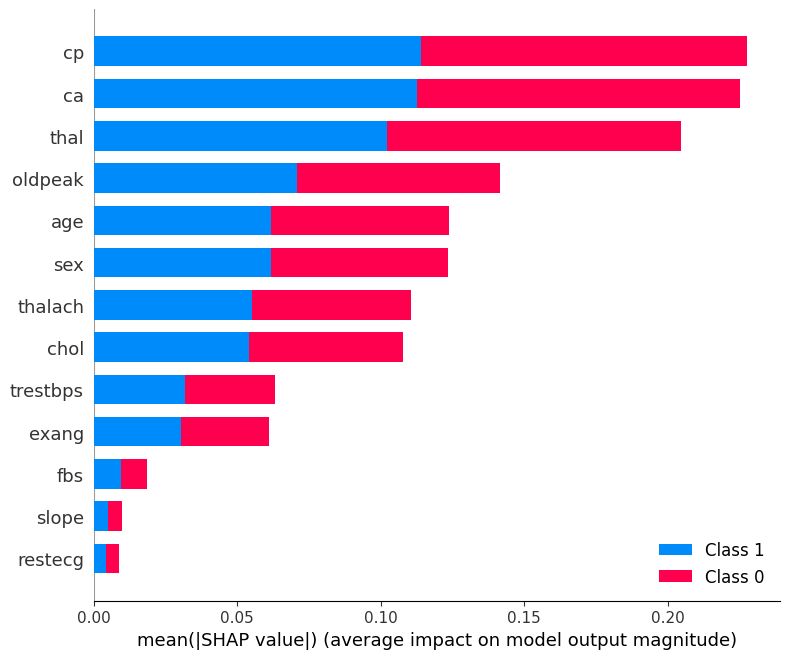

Permutation Importance for oldpeak: [ 0.         -0.0097561   0.         -0.00487805 -0.0097561   0.
 -0.00487805 -0.0097561   0.         -0.00487805 -0.00487805 -0.00487805
 -0.0097561  -0.00487805  0.          0.         -0.00487805 -0.0097561
 -0.00487805 -0.00487805 -0.00487805 -0.00487805 -0.0097561  -0.00487805
 -0.00487805  0.         -0.00487805  0.         -0.00487805 -0.00487805
 -0.0097561   0.         -0.00487805 -0.00487805  0.          0.
 -0.0097561  -0.00487805 -0.00487805  0.         -0.0097561   0.
 -0.0097561  -0.00487805 -0.00487805 -0.00487805 -0.0097561  -0.0097561
 -0.00487805  0.        ]
Permutation Importance for cp: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


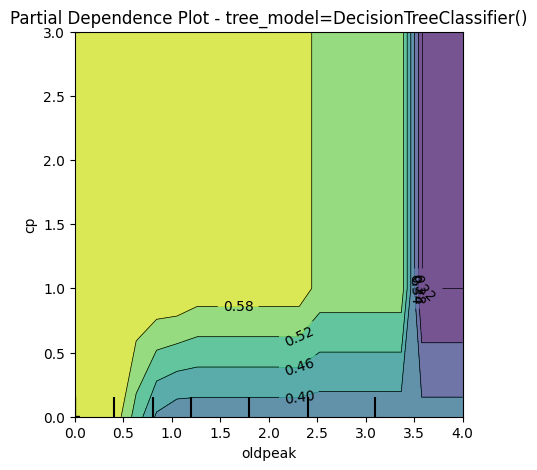

In [22]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_explainer = shap.Explainer(tree_model, X_train)
tree_shap_values = tree_explainer.shap_values(X_test)
shap.summary_plot(tree_shap_values, X_test, feature_names=X_test.columns, title="Decision Tree SHAP Summary Plot")

fig, ax = plt.subplots(figsize=(5, 5))
column_one = "oldpeak"
column_two = "cp"
feature_indices = [X_test.columns.get_loc(column_one), X_test.columns.get_loc(column_two)]
permutation_importance_scores = result.importances[feature_indices]
print(f"Permutation Importance for {column_one}: {permutation_importance_scores[0]}")
print(f"Permutation Importance for {column_two}: {permutation_importance_scores[1]}")
PartialDependenceDisplay.from_estimator(tree_model, X_test, [(column_one, column_two)], n_jobs=3, grid_resolution=20, ax=ax)
ax.set_title(f'Partial Dependence Plot - {tree_model=}')
plt.show()

##### Explanation:
For the logistic model the top 4 most important features: cp, sex, oldpeak, ca. 

For the tree model the top 4 most important features: cp, ca, thal, oldpeak

Features with tall red bars are positively associated with higher model predictions. This means that higher values of these features tend to increase the likelihood of the target event (e.g., cp belonging to Class 1).
Features with tall blue bars are negatively associated with higher model predictions. Higher values of these features tend to decrease the likelihood of the target event (e.g., cp belonging to Class 0).
Features close to the horizontal line have little impact on predictions, while those far from the line have a more substantial influence (e.g., 'fbs' feature).

The main difference between tree model and logistic model is that the logistic model takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way while tree model takes in account for positive (Class 1) and negative (Class 0) predictions separately. This is why the tree model has more features with tall red bars and tall blue bars. Both models are interpretable, but decision trees provide interpretability in terms of rules, while logistic regression provides it in terms of coefficients. Decision trees can be prone to overfitting if they are too deep, while logistic regression models are generally less prone to overfitting. While logistic regression may be more robust when dealing with noisy data or situations where the relationship between features and the target is not well-captured by a tree-like structure.